In [1]:
!pip install sidetable -U

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable
from scipy import stats as st

# Project description
We have to work with dataset from the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. We need **to identify patterns that determine whether a game succeeds or not.** This will allow to online store to spot potential big winners and plan advertising campaigns.

The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.   

Let's define to our probable steps and what we going do with data:   
*1. Step 1 - Let's study our data in general, what we should work with.*   
*2. Step 2 - We'll prepare the data and make changes, if it needed (working with missing values, incorrect data types, making necessary calculations)*    
*3. Step 3 - Our probably one of the huge steps: analyze data. Dependences between platforms, sales regions and periods. Let's draw histograms, boxplots to work with distributions and dispersions.*   
*4. Step 4 - Create different users for our further steps.*   
*5. Step 5 - Test following hypotheses:*   
- **Average user ratings of the Xbox One and PC platforms are the same.**   
- **Average user ratings for the Action and Sports genres are different.**



PS: and we'll try new library for us (sidetable) 

### Step 1. Take a look at general information
Ok, we going to proceed to first step: 

In [4]:
try:
    data = pd.read_csv(r"C:\Users\Dell\Documents\tempPy\myProjects\ForGit\Video games analysis_FirstIntegrated\moved_games.csv")
except:
    print('Try another database')

In [5]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
data.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [7]:
data.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
8141,Pirates: Hunt For Blackbeard's Booty,Wii,2008.0,Adventure,0.08,0.08,0.00,0.02,NaN,tbd,E
14797,Cossacks: European Wars,PC,2001.0,Strategy,0.00,0.02,0.00,0.00,74.0,8.6,T
9445,Slime MoriMori Dragon Quest 3: Taikaizoku to S...,3DS,2011.0,Role-Playing,0.00,0.00,0.13,0.00,NaN,NaN,NaN
3070,Lollipop Chainsaw,PS3,2012.0,Action,0.27,0.20,0.11,0.08,67.0,7.1,M
8217,Warriors of Might and Magic,PS2,2001.0,Adventure,0.09,0.07,0.00,0.02,49.0,4.5,T
2764,The Lord of the Rings: The Two Towers,GBA,2002.0,Action,0.53,0.20,0.00,0.01,NaN,NaN,NaN
10458,Pro Evolution Soccer 2014,PC,2013.0,Action,0.00,0.10,0.00,0.01,74.0,4.4,E
1475,The Elder Scrolls V: Skyrim,PS4,2016.0,Role-Playing,0.48,0.59,0.04,0.21,NaN,NaN,NaN
7867,Phantasy Star Universe,PS2,2006.0,Role-Playing,0.00,0.00,0.19,0.00,68.0,8.5,T
4647,High Rollers Casino,PS2,2004.0,Misc,0.20,0.16,0.00,0.05,NaN,tbd,E


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [9]:
data.stb.missing(style = True)

,missing,total,percent
Critic_Score,"8,578","16,715",51.32%
Rating,"6,766","16,715",40.48%
User_Score,"6,701","16,715",40.09%
Year_of_Release,269,"16,715",1.61%
Name,2,"16,715",0.01%
Genre,2,"16,715",0.01%
Platform,0,"16,715",0.00%
NA_sales,0,"16,715",0.00%
EU_sales,0,"16,715",0.00%
JP_sales,0,"16,715",0.00%


In [12]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [11]:
data.describe(include = 'object')

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


#### Conclusion Step 1:   

So, as we see, in our dataset there are several issues that we have to deal with:   
- names of columns start with upper letter   
- the **'Year_of_Release'** column has float type, but should be integer.   
- the **'User_Score'** column simultaneously consist values, that we define like *'float'* type and *'string'* type and apparently should be in the same scale with **'Critic_Score'**.   
- there are 3 columns with small amount missing values and 3 ones where more than 40 % missing values.  

### Step 2. Preparing date

Ok, let's convert column names to lower case

In [13]:
data.columns = data.columns.str.lower()

In [14]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Next one - missing values in column "years_of_release" isn't significant, so let's fill it up with just nulls, and let's convert to integer type

In [13]:
data['year_of_release'] = data['year_of_release'].fillna(0).astype(int)

In [14]:
data['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
0        269
1996     263
1995     219
1994     121
1993      62
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

The next one - how to deal with missing values. Uh, after several attempts to fill them up with median values, I've realized that it's a little bit wrong way, **despite further calculations**. Let's take a closer look why.   

As the industry is developing there are a lot of games are publishing. The critics may just not make any conclusions on different games because of huge number of games. We can't find out which game was sent on review, and which one wasn't.   

Also, we know, that critics estimate video games complexly: graphics, gameplay, plot and etc. Yes, we can assume that the same game might have the same level of critic or users score for different platforms. But as the gamers say, user experience is quite different for particular platform and it may have huge impact on scoring. If you've ever played once **"Call of Duty"** (in **"shooter" genre**) both on PC (with mouse and keyboard) and on Xbox (with joystick) you would definitely agree that it's little bit complicated to compare with each over: for some it's convenient on the PC, for others - on consoles.    
The same situation with, for instance, kind of races (with weel controller) and sport games.   

Another assumption could be to fill up with median values based on **dates, platforms and genres, but it's wrong as well.** For example, the same games may be published by different developers with different teams according franchise. We don't have in our data separately **developer's column,** so we can't state that game X in "Action" genre from developer1 should have the same score with game Y in this genre from developer2.  

So, I'm going to work with filtered data and don't touch the initial data. Let's exclude missing values from **"critic_score"** column  

In [15]:
fil_data = data[data['critic_score'].notnull()].reset_index()
fil_data.drop("index", axis = 1, inplace = True)
fil_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
2,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
3,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
4,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
...,...,...,...,...,...,...,...,...,...,...,...
8132,Breach,PC,2011,Shooter,0.01,0.00,0.00,0.00,61.0,5.8,T
8133,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.00,0.00,53.0,tbd,E
8134,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.00,0.00,48.0,tbd,E
8135,STORM: Frontline Nation,PC,2011,Strategy,0.00,0.01,0.00,0.00,60.0,7.2,E10+


As we remember the most common value in **"user_score"** column is **"tbd"** that means **"to be determined"**. Usually, this abbreviation used to indicate that the time of something has not yet been decided and will be announced at a later time. It may correspond to year of release (for new games), m?    

In [16]:
fil_data[fil_data.user_score == 'tbd']['year_of_release'].value_counts()

2002    172
2008    116
2007    102
2009     94
2005     90
2006     90
2003     84
2004     81
2001     69
2010     67
2000     40
2011     32
0        26
1999      6
2016      5
2014      4
2015      2
1997      1
2013      1
Name: year_of_release, dtype: int64

But as we see, "tbd" status is being found in different sort of years. We won't be able to deal with him, so let's exclude him as well

In [17]:
fil_data = fil_data.query('user_score != "tbd"').reset_index()

In [18]:
fil_data.drop("index", axis = 1, inplace = True)
fil_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
2,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
3,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
4,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
...,...,...,...,...,...,...,...,...,...,...,...
7050,Mortal Kombat: Deadly Alliance,GBA,2002,Fighting,0.01,0.00,0.00,0.00,81.0,8.8,M
7051,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80.0,7.6,M
7052,Breach,PC,2011,Shooter,0.01,0.00,0.00,0.00,61.0,5.8,T
7053,STORM: Frontline Nation,PC,2011,Strategy,0.00,0.01,0.00,0.00,60.0,7.2,E10+


The rest rows let's fill up with median values and convert in the same with **"critic_score"** scale

In [19]:
fil_data['user_score'] = fil_data['user_score'].fillna(fil_data.groupby('genre')['user_score'].transform('median'))

In [20]:
fil_data['user_score'] = fil_data['user_score'].astype(float)*10

The next one - let's fill up the missing values in **"rating"** column with most common values for particular genre:

In [21]:
fil_data['rating'] = fil_data.groupby('genre')['rating'].transform(lambda x: x.fillna(x.mode().max()))

In [22]:
fil_data.stb.missing(style=True)

,missing,total,percent
name,0,"7,055",0.00%
platform,0,"7,055",0.00%
year_of_release,0,"7,055",0.00%
genre,0,"7,055",0.00%
na_sales,0,"7,055",0.00%
eu_sales,0,"7,055",0.00%
jp_sales,0,"7,055",0.00%
other_sales,0,"7,055",0.00%
critic_score,0,"7,055",0.00%
user_score,0,"7,055",0.00%


In [23]:
fil_data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,7055.000000,7055.000000,7055.000000,7055.000000,7055.000000,7055.000000,7055.000000
mean,1971.050461,0.388354,0.232668,0.062771,0.081202,70.233877,71.840539
std,267.987404,0.955386,0.678110,0.283520,0.265937,13.885728,14.375605
min,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,5.000000
25%,2004.000000,0.060000,0.020000,0.000000,0.010000,62.000000,65.000000
50%,2007.000000,0.150000,0.060000,0.000000,0.020000,72.000000,75.000000
75%,2011.000000,0.380000,0.200000,0.010000,0.070000,80.000000,82.000000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,98.000000,96.000000


And the last one - let's calculate the total sales and put results into new column **'total_sales'**

In [24]:
fil_data['total_sales'] = fil_data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis = 1)
fil_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54
1,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,35.52
2,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,32.77
3,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,85.0,E,29.80
4,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,66.0,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
7050,Mortal Kombat: Deadly Alliance,GBA,2002,Fighting,0.01,0.00,0.00,0.00,81.0,88.0,M,0.01
7051,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80.0,76.0,M,0.01
7052,Breach,PC,2011,Shooter,0.01,0.00,0.00,0.00,61.0,58.0,T,0.01
7053,STORM: Frontline Nation,PC,2011,Strategy,0.00,0.01,0.00,0.00,60.0,72.0,E10+,0.01


### Step 3. Analysis date

Ok, let's answer on questions what we were asked in description   
*1. Look at how many games were released in different years. Is the data for every period significant?*   


In [25]:
years_games = fil_data.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count').reset_index()
years_games = years_games.query('year_of_release != 0')
years_games

,year_of_release,name
1,1985,1
2,1988,1
3,1992,1
4,1994,1
5,1996,8
6,1997,16
7,1998,28
8,1999,33
9,2000,103
10,2001,257


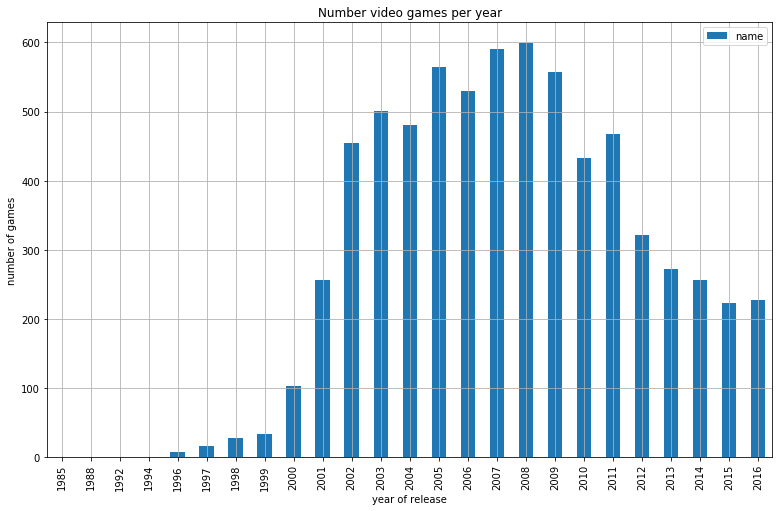

In [26]:
years_games.plot(x = 'year_of_release', y = 'name', kind = 'bar', grid = True, figsize =(13, 8));
plt.title('Number video games per year');
plt.xlabel('year of release');
plt.ylabel('number of games');

***
As we see we have kind of leap in 2001 year, after that the data tend to increase and from 2012 little bit decreasing to 2001 values.  

*2. Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?*

First, let's determine how sales veried: 

In [27]:
sales_plat = fil_data[['platform','total_sales']].groupby('platform')['total_sales'].sum().sort_values(ascending = False).reset_index()
sales_plat

,platform,total_sales
0,PS2,962.42
1,X360,863.58
2,PS3,793.20
3,Wii,672.97
4,DS,384.14
5,PS4,244.44
6,PS,221.81
7,XB,218.12
8,PC,196.18
9,PSP,190.21


As was early mentioned on workshop we have weird distribution of sales by platforms, kind of gap between platforms. Let's work with 'z-score' or 'standard score'. To do so we create a new column with values according formula:   
$$   
z = \frac{x - \mu}{\sigma} \\  
$$ 

In [28]:
sales_plat['sales_z'] = (sales_plat['total_sales'] - sales_plat['total_sales'].mean()) / sales_plat['total_sales'].std()
sales_plat

,platform,total_sales,sales_z
0,PS2,962.42,2.105895
1,X360,863.58,1.783160
2,PS3,793.20,1.553354
3,Wii,672.97,1.160776
4,DS,384.14,0.217683
5,PS4,244.44,-0.238469
6,PS,221.81,-0.312361
7,XB,218.12,-0.324409
8,PC,196.18,-0.396048
9,PSP,190.21,-0.415542


In [29]:
sales_plat['color'] = ['red' if x < 0 else 'green' for x in sales_plat['sales_z']]
sales_plat

,platform,total_sales,sales_z,color
0,PS2,962.42,2.105895,green
1,X360,863.58,1.783160,green
2,PS3,793.20,1.553354,green
3,Wii,672.97,1.160776,green
4,DS,384.14,0.217683,green
5,PS4,244.44,-0.238469,red
6,PS,221.81,-0.312361,red
7,XB,218.12,-0.324409,red
8,PC,196.18,-0.396048,red
9,PSP,190.21,-0.415542,red


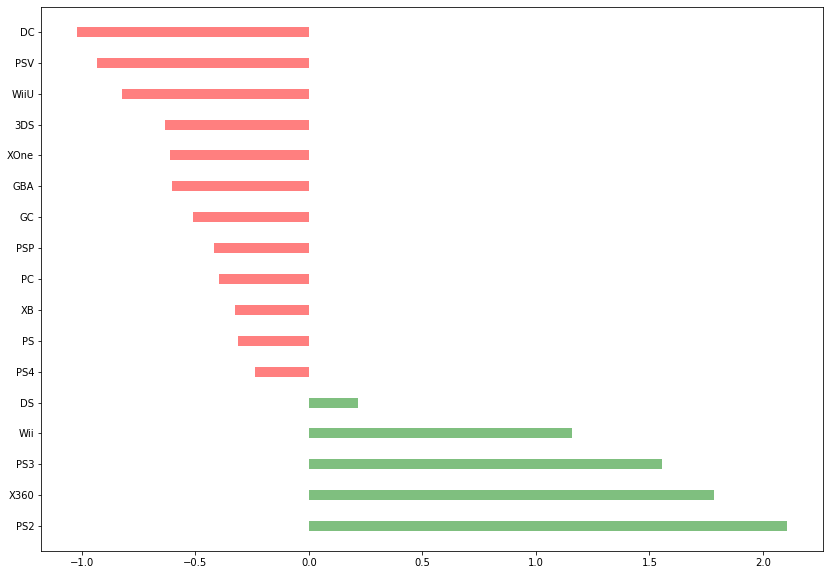

In [30]:
plt.figure(figsize = (14, 10));
plt.hlines(y = sales_plat.platform, xmax = sales_plat.sales_z, 
           xmin = 0, color = sales_plat.color, alpha = 0.5, linewidth = 10);

Well, we can assume the platforms that above 'z-score', and they are:    
- PS2   
- X360   
- PS3   
- Wii   
- DS

Let's take a look what the distribution is, based on data for each year:

In [31]:
platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS']
great_sales = fil_data.query('platform in @platforms and year_of_release != 0').pivot_table(index = 'year_of_release', 
                                                                                            columns = 'platform', 
                                                                                            values = 'total_sales', 
                                                                                            aggfunc = 'sum').fillna(0)
great_sales 

platform,DS,PS2,PS3,Wii,X360
year_of_release,,,,,
2000,0.00,29.50,0.00,0.00,0.00
2001,0.00,145.96,0.00,0.00,0.00
2002,0.00,169.99,0.00,0.00,0.00
2003,0.00,144.27,0.00,0.00,0.00
2004,3.38,188.34,0.00,0.00,0.00
2005,96.20,117.70,0.00,0.00,7.64
2006,72.56,75.98,19.62,135.02,48.92
2007,77.47,48.08,68.52,127.31,89.39
2008,63.43,21.15,110.01,131.05,129.16


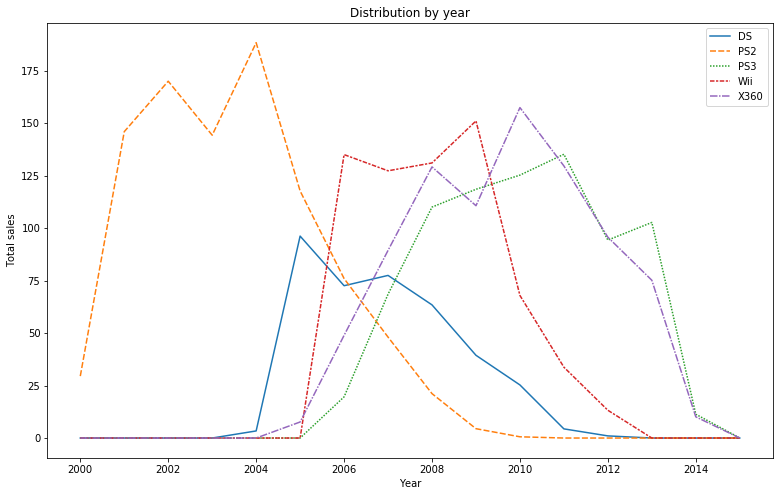

In [32]:
fig, ax = plt.subplots(figsize = (13, 8));
ax = sns.lineplot(data=great_sales);
plt.title('Distribution by year'); 
plt.xlabel('Year');
plt.ylabel('Total sales');

***
We can determine, that hole lifecycle takes 9-10 years, and it takes 6 years, then the new platform appears and the old ones fade absolutly.  

Additionally, we can see that period with most high level of sales takes usually 3-5 years. So, let's define it like our **actual period** 

*3. Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.*    

Accoding line plot above let's proceed with data where date of release later 2013 year

*4. Work only with the data that you've decided is relevant. Disregard the data for previous years.*

In [33]:
actual_data = fil_data.query('year_of_release >= 2013').reset_index()
actual_data.drop("index", axis = 1, inplace = True)
actual_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,82.0,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,81.0,M,16.27
2,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,83.0,M,12.62
3,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,26.0,M,10.24
4,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,26.0,M,9.36
...,...,...,...,...,...,...,...,...,...,...,...,...
974,Saints Row: Gat out of Hell,XOne,2015,Action,0.00,0.01,0.00,0.00,65.0,60.0,M,0.01
975,Sébastien Loeb Rally Evo,XOne,2016,Racing,0.00,0.01,0.00,0.00,63.0,82.0,E,0.01
976,Fast Racing Neo,WiiU,2016,Action,0.00,0.01,0.00,0.00,81.0,85.0,E,0.01
977,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,67.0,T,0.01


***
In terms of determining "actual" period what we should work with we can consider period 3-4 years. I've noticed that each platform has kind of most profitable period in their lifecycle from appearing in market and it takes usually 3-5 years. And, if we consider future campaign for 2017 this period at least should include this year

*5. Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.*    

To do so let's plot heatmap:

In [34]:
actual_data_sales = actual_data.pivot_table(index = 'year_of_release', 
                                            columns ='platform', 
                                            values ='total_sales', 
                                            aggfunc = 'sum').fillna(0)
actual_data_sales

platform,3DS,PC,PS3,PS4,PSP,PSV,WiiU,X360,XOne
year_of_release,,,,,,,,,
2013,15.89,10.98,102.70,25.07,0.15,5.96,17.40,75.17,14.92
2014,11.49,11.79,11.34,80.95,0.00,5.27,15.22,10.10,47.01
2015,10.55,7.18,0.02,81.07,0.00,1.72,15.35,0.00,44.61
2016,2.17,4.89,0.00,57.35,0.00,0.93,3.26,0.00,23.70


In [35]:
change = (actual_data_sales - actual_data_sales.shift(+1)).fillna(0).T
change

year_of_release,2013,2014,2015,2016
platform,,,,
3DS,0.0,-4.40,-0.94,-8.38
PC,0.0,0.81,-4.61,-2.29
PS3,0.0,-91.36,-11.32,-0.02
PS4,0.0,55.88,0.12,-23.72
PSP,0.0,-0.15,0.00,0.00
PSV,0.0,-0.69,-3.55,-0.79
WiiU,0.0,-2.18,0.13,-12.09
X360,0.0,-65.07,-10.10,0.00
XOne,0.0,32.09,-2.40,-20.91


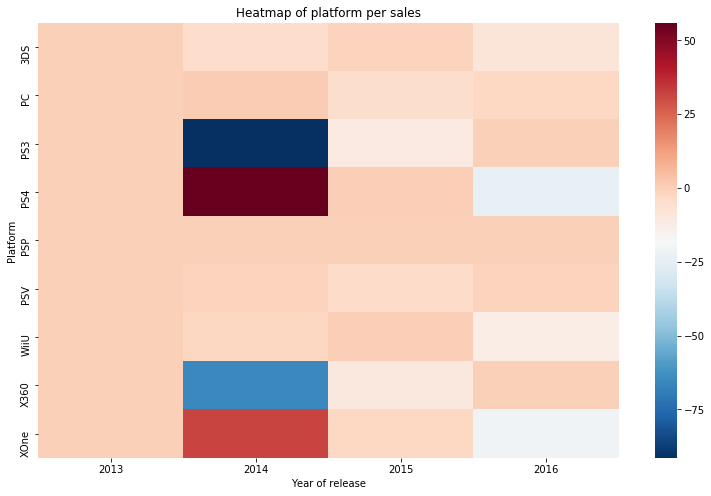

In [36]:
plt.figure(figsize = (13,8));
sns.heatmap(change, cmap = 'RdBu_r');
plt.title('Heatmap of platform per sales');
plt.xlabel('Year of release');
plt.ylabel('Platform');

So, we may assume that **"PS4"** and **"XOne"** might be potentially profitable platforms, regardless of decreasing sales in 2016. These platforms have obvious peak of sales in 2014, and according the data that we've obtained before, they may have "success" in future.

*6. Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.*

In [37]:
box_data = actual_data.groupby(['platform','name'])['total_sales'].sum().reset_index()
box_data

,platform,name,total_sales
0,3DS,7th Dragon III Code: VFD,0.16
1,3DS,Adventure Time: The Secret of the Nameless Kin...,0.07
2,3DS,Animal Crossing: Happy Home Designer,3.05
3,3DS,Attack on Titan: Humanity in Chains,0.42
4,3DS,Azure Striker Gunvolt,0.01
...,...,...,...
974,XOne,Wolfenstein: The Old Blood,0.15
975,XOne,Worms: WMD,0.01
976,XOne,XCOM 2,0.04
977,XOne,Zombie Army Trilogy,0.11


In [38]:
order = actual_data[['platform','total_sales']].groupby('platform')['total_sales'].sum().sort_values(ascending = False).reset_index()
order

,platform,total_sales
0,PS4,244.44
1,XOne,130.24
2,PS3,114.06
3,X360,85.27
4,WiiU,51.23
5,3DS,40.10
6,PC,34.84
7,PSV,13.88
8,PSP,0.15


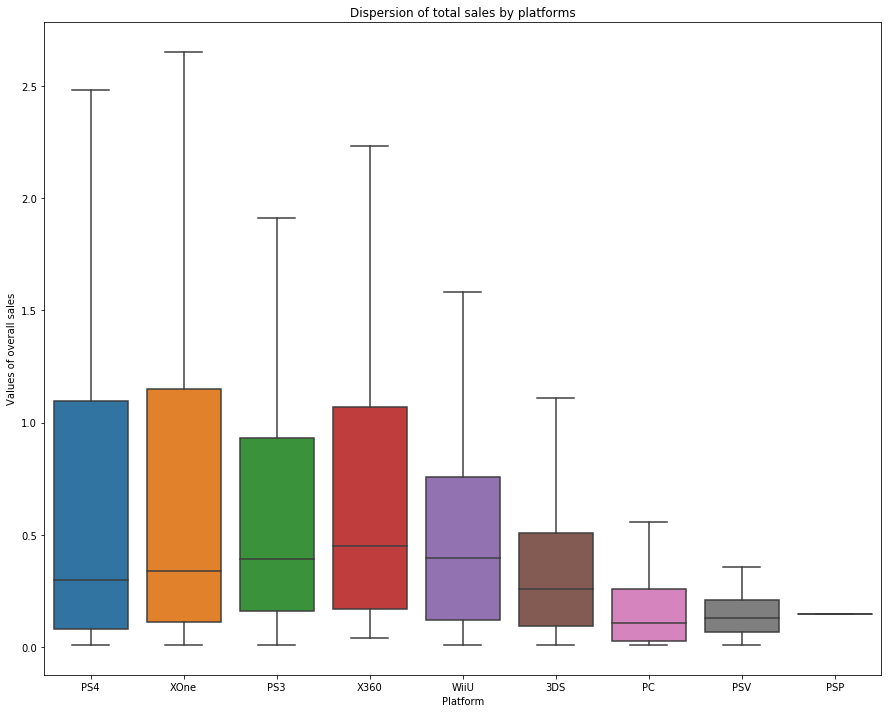

In [39]:
plt.figure(figsize = (15, 12));
sns.boxplot(x='platform', y='total_sales', data = box_data, showfliers=False, order = order.platform);
plt.title('Dispersion of total sales by platforms');
plt.xlabel('Platform');
plt.ylabel('Values of overall sales');

***
Ok, as we see first two platform have almost the same results: **PS4 and XOne** have same distributions. First five platforms have 'medians' between 0.3 and 0.4 million USD.  

*7. Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.*

First, we'll obtain required dataset:

In [40]:
ps4 = actual_data.query('platform == "PS4"')
ps4 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,83.0,M,12.62
5,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,43.0,E,8.58
6,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,57.0,M,7.66
7,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,50.0,E,7.60
8,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,65.0,M,7.17
...,...,...,...,...,...,...,...,...,...,...,...,...
967,Super Dungeon Bros,PS4,2016,Action,0.01,0.00,0.00,0.00,42.0,23.0,E10+,0.01
968,Sherlock Holmes: The Devil's Daughter,PS4,2016,Adventure,0.01,0.00,0.00,0.00,70.0,68.0,T,0.01
969,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69.0,75.0,M,0.01
972,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61.0,79.0,T,0.01


0.4064685741971657

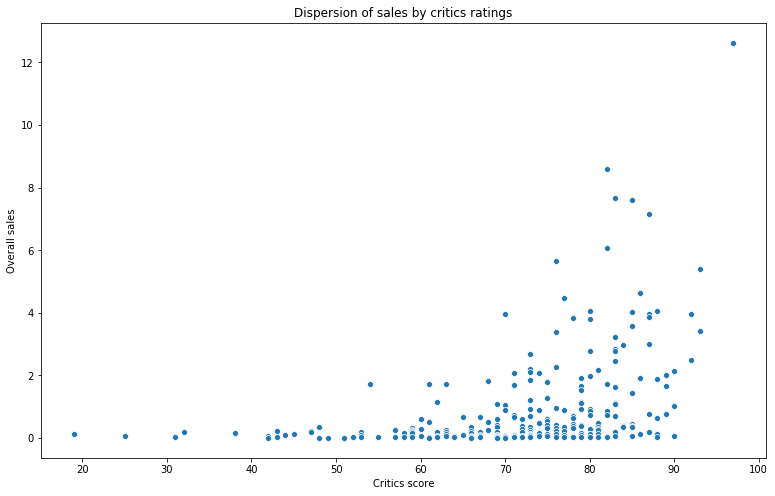

In [41]:
fig, ax = plt.subplots(figsize = (13, 8));
ax = sns.scatterplot(data=ps4, x="critic_score", y="total_sales");
plt.title('Dispersion of sales by critics ratings');
plt.xlabel('Critics score');
plt.ylabel('Overall sales');
ps4['total_sales'].corr(ps4['critic_score'])

-0.03447809382351739

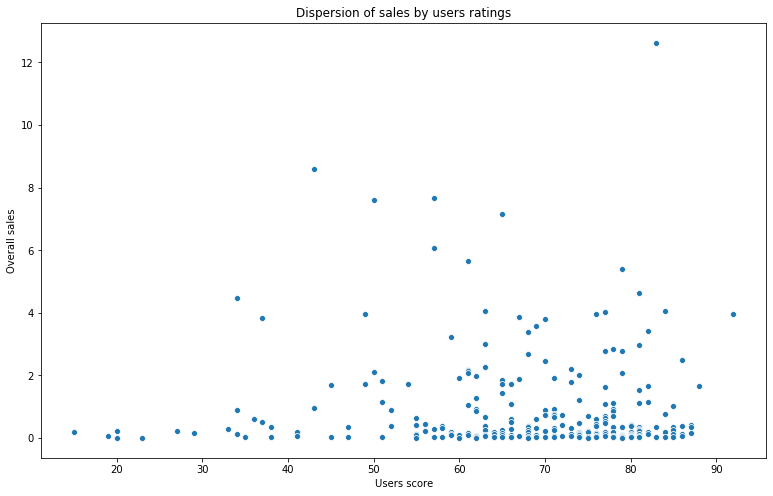

In [42]:
fig, ax = plt.subplots(figsize = (13, 8));
ax = sns.scatterplot(data=ps4, x="user_score", y="total_sales");
plt.title('Dispersion of sales by users ratings');
plt.xlabel('Users score');
plt.ylabel('Overall sales');
ps4['total_sales'].corr(ps4['user_score'])

***
Ok, for correlation between critics score and level of sales we obtain positive correlation coefficient, that means while critics leave the positive comments and estimates, the total sales achieve quite high level. But the dependency isn't strong, it looks like critic's ratings didn't have huge impact on sales.   
In other hand, correlation between users score and level of sales has negative correlation coefficient, and dependence very weak that means, user scores almost don't have impact on sales, as well.   

*8. Keeping your conclusions in mind, compare the sales of the same games on other platforms.*

Ok, let's get datasets... 

In [43]:
x360 = actual_data.query('platform == "X360"')
ps3 = actual_data.query('platform == "PS3"')
xone = actual_data.query('platform == "XOne"')

.. And write small function..  

In [44]:
def build_cor(plat):
    fig, ax = plt.subplots(figsize = (13, 8));
    ax = sns.scatterplot(data=plat, x="critic_score", y='total_sales');
    plt.title('Dispersion of sales by critics ratings');
    plt.xlabel('Critics score');
    plt.ylabel('Overall sales');
    print("Correlation sales/critics score:", plat.total_sales.corr(plat.critic_score))
    
    fig, ax = plt.subplots(figsize = (13, 8));
    ax = sns.scatterplot(data=plat, x="user_score", y='total_sales');
    plt.title('Dispersion of sales by users ratings');
    plt.xlabel('Users score');
    plt.ylabel('Overall sales');
    print("Correlation sales/users score:", plat['total_sales'].corr(plat['user_score']))

... And after call function for each dataset:

Correlation sales/critics score: 0.3503445460228664
Correlation sales/users score: -0.006238179532306257


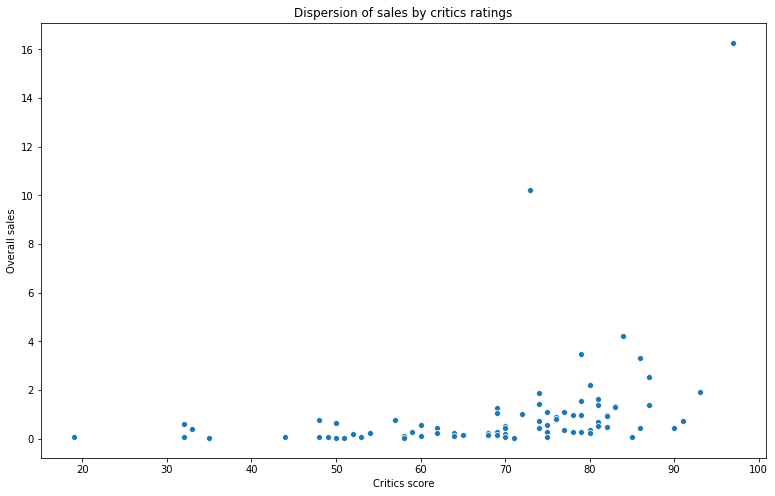

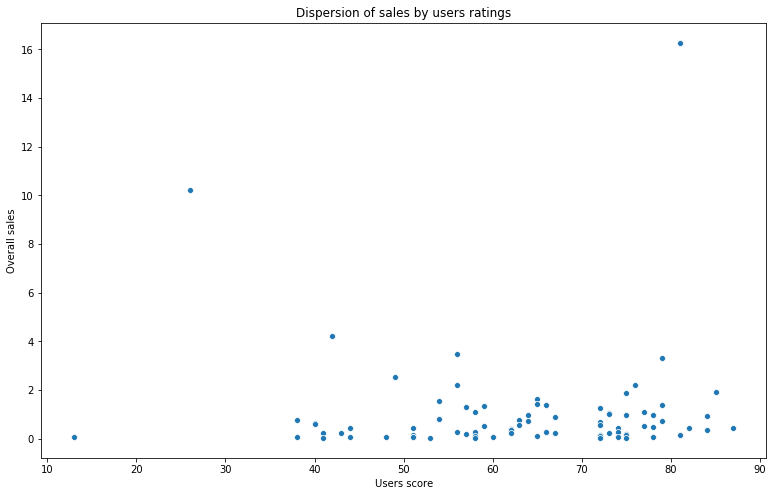

In [45]:
build_cor(x360)

Correlation sales/critics score: 0.3338066356506173
Correlation sales/users score: 0.02269094327112415


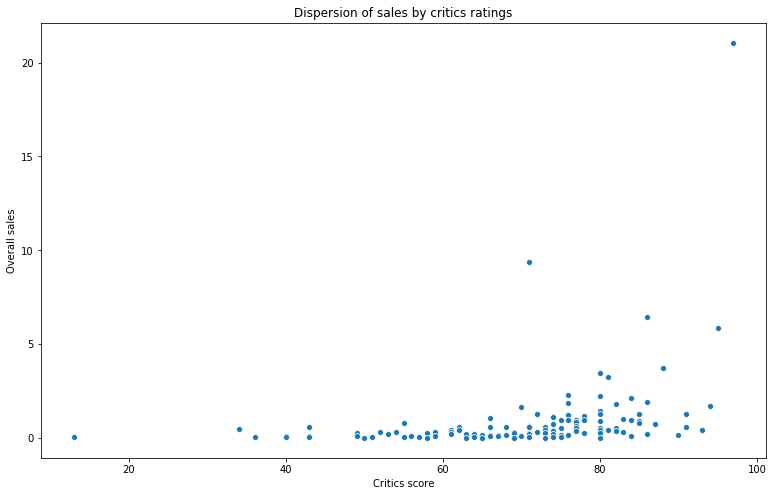

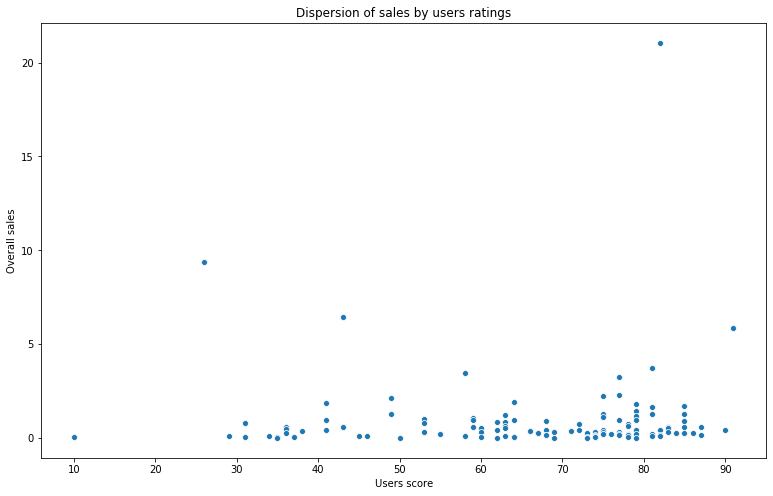

In [46]:
build_cor(ps3)

Correlation sales/critics score: 0.41215586820316974
Correlation sales/users score: -0.09656918068672911


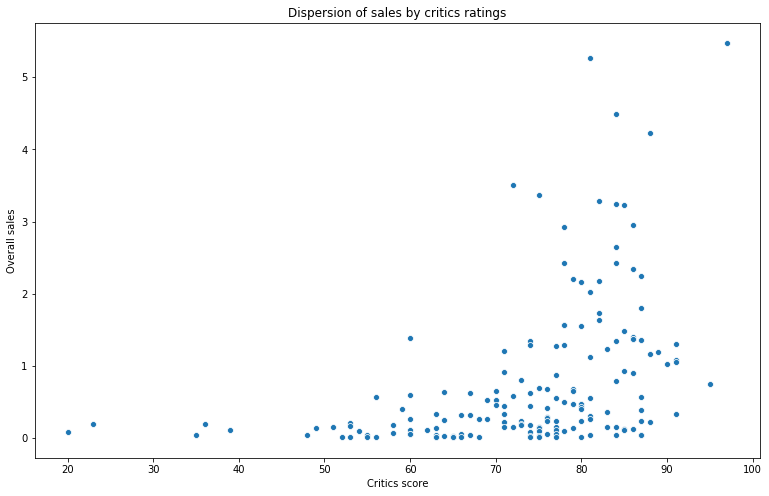

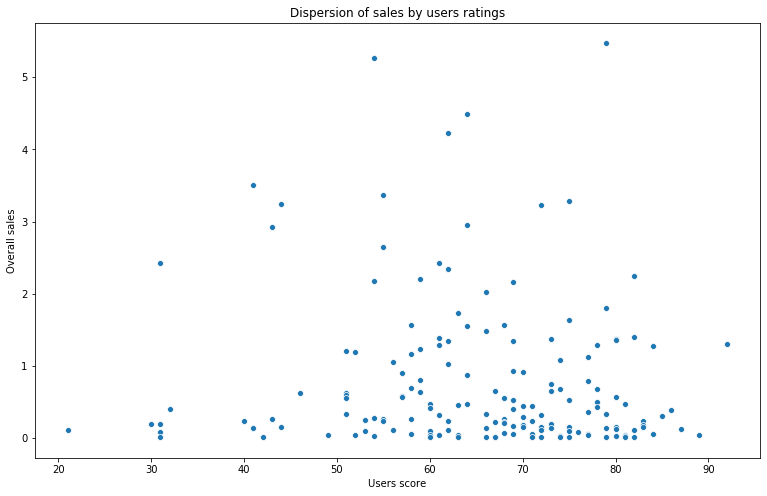

In [47]:
build_cor(xone)

OK, we obtain following results:

| Platform | Correlation sales/critics score | Correlation sales/users score: |
|----------|---------------------------------|--------------------------------|
| X360     | 0.3364904547521794              | 0.052764910890861716           |
| PS3      | 0.4064685741971657              | -0.03447809382351739           |
| XOne     | 0.41215586820316974             | -0.09656918068672911           |

***
We can say that from platform-to-platform correlation coefficient between sales and critic scores still stay positive, but several platforms have stronger dependence and other ones weaker. In other hand correlation coefficient between sales and user's ratings are changing from positive to negative and varied more in terms of dependence. 

*9. Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?*

Let's get the general dataset in terms of number of games and their overall sales:

In [48]:
sales_by_genre = actual_data.pivot_table(index = 'genre', 
                                         values ='total_sales', 
                                         aggfunc = 'sum').reset_index().sort_values(by='total_sales')
sales_by_genre

,genre,total_sales
5,Puzzle,2.24
11,Strategy,7.49
1,Adventure,10.03
9,Simulation,12.07
2,Fighting,17.79
3,Misc,19.39
4,Platform,31.98
6,Racing,34.29
7,Role-Playing,61.21
10,Sports,115.06


In [49]:
avr_sales_by_genre = actual_data.pivot_table(index = 'genre', 
                                         values ='total_sales', 
                                         aggfunc = 'mean').reset_index().sort_values(by='total_sales')
avr_sales_by_genre

,genre,total_sales
1,Adventure,0.218043
11,Strategy,0.288077
5,Puzzle,0.320000
2,Fighting,0.423571
3,Misc,0.461667
9,Simulation,0.464231
7,Role-Playing,0.481969
6,Racing,0.562131
4,Platform,0.639600
0,Action,0.747323


In [50]:
games_by_genre = actual_data.pivot_table(index = 'genre', 
                                         values ='name', 
                                         aggfunc = 'count').reset_index().sort_values(by='name')
games_by_genre

,genre,name
5,Puzzle,7
9,Simulation,26
11,Strategy,26
2,Fighting,42
3,Misc,42
1,Adventure,46
4,Platform,50
6,Racing,61
10,Sports,110
7,Role-Playing,127


In [51]:
by_genre = pd.merge(left = sales_by_genre, right = games_by_genre, how='inner',on='genre')
by_genre

,genre,total_sales,name
0,Puzzle,2.24,7
1,Strategy,7.49,26
2,Adventure,10.03,46
3,Simulation,12.07,26
4,Fighting,17.79,42
5,Misc,19.39,42
6,Platform,31.98,50
7,Racing,34.29,61
8,Role-Playing,61.21,127
9,Sports,115.06,110


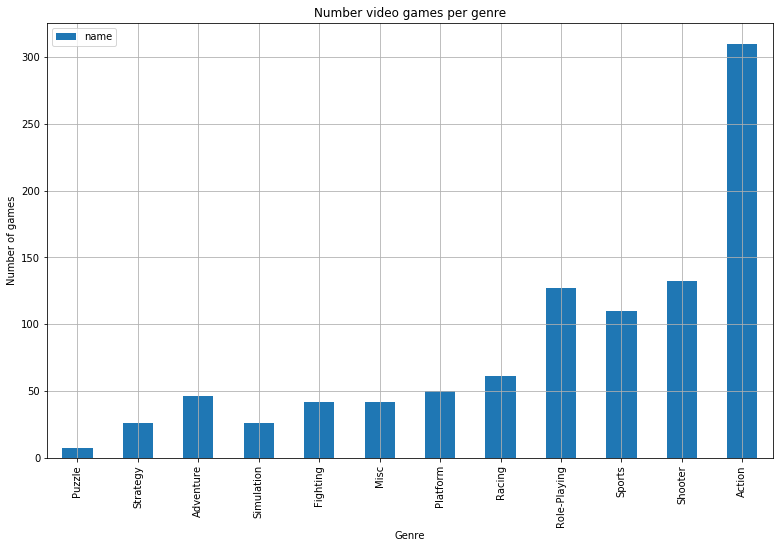

In [52]:
by_genre.plot(x = 'genre', y = 'name', kind = 'bar', grid = True, figsize =(13, 8));
plt.title('Number video games per genre');
plt.xlabel('Genre');
plt.ylabel('Number of games');

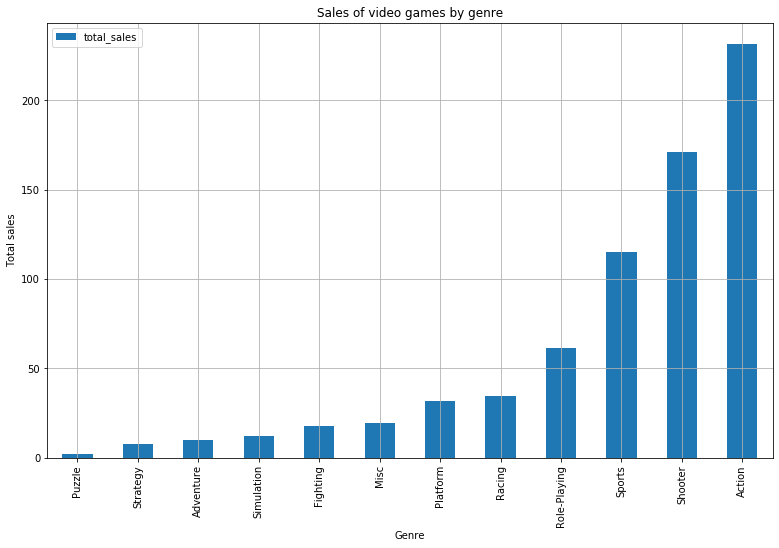

In [53]:
by_genre.plot(x = 'genre', y = 'total_sales', kind = 'bar', grid = True, figsize =(13, 8));
plt.title('Sales of video games by genre');
plt.xlabel('Genre');
plt.ylabel('Total sales');

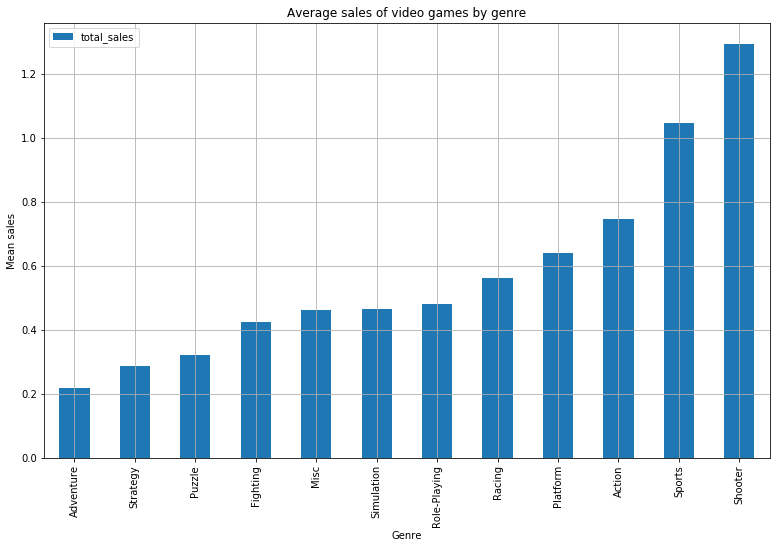

In [54]:
avr_sales_by_genre.plot(x = 'genre', y = 'total_sales', kind = 'bar', grid = True, figsize =(13, 8));
plt.title('Average sales of video games by genre');
plt.xlabel('Genre');
plt.ylabel('Mean sales');

***
As we see the same genres are distribute respectively: **"Action"** has highest number of games and they get the highest level of revenue. The same picture for other type of genres. But if we consider average sales for each genre we will obtain another leader - **"Shooters" and "Sports"** take first places.    

### Step 4. Create a user profile for each region

For each region (NA, EU, JP), determine:

The top five platforms are

In [55]:
na_platform = actual_data.groupby('platform')['na_sales'].sum().reset_index().sort_values(by='na_sales', 
                                                                                          ascending = False).head()
na_platform

,platform,na_sales
3,PS4,84.46
8,XOne,76.03
7,X360,50.85
2,PS3,42.13
6,WiiU,23.04


In [56]:
eu_platform = actual_data.groupby('platform')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', 
                                                                                          ascending = False).head()
eu_platform

,platform,eu_sales
3,PS4,112.56
2,PS3,43.29
8,XOne,42.26
7,X360,26.54
1,PC,21.98


In [57]:
jp_platform = actual_data.groupby('platform')['jp_sales'].sum().reset_index().sort_values(by = 'jp_sales', 
                                                                                          ascending = False).head()
jp_platform

,platform,jp_sales
0,3DS,14.16
2,PS3,10.99
3,PS4,9.46
6,WiiU,8.36
5,PSV,5.71


*** 
Ok, in terms of revenue, if we consider "actual period" that we have choose before, PS4 leads in North America and Europe markets. Also, the same platforms get almost same places: XOne is second in NA, and third in EU, X360 - third in NA and forth in EU, PS3 forth in NA and second in EU.   
In Japan people prefer their own platform 3DS made by Nintendo.  
All three regions have different distribution: more smooth in NA and JP, and "explicit leader" in EU.  

The top five genres are:

In [58]:
na_genre = actual_data.groupby('genre')['na_sales'].sum().reset_index().sort_values(by='na_sales', 
                                                                                    ascending = False).head()
na_genre

,genre,na_sales
0,Action,97.06
8,Shooter,81.03
10,Sports,51.16
7,Role-Playing,23.08
4,Platform,13.75


In [59]:
eu_genre = actual_data.groupby('genre')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', 
                                                                                    ascending = False).head()
eu_genre

,genre,eu_sales
0,Action,91.05
8,Shooter,64.04
10,Sports,46.96
7,Role-Playing,19.28
6,Racing,17.05


In [60]:
jp_genre = actual_data.groupby('genre')['jp_sales'].sum().reset_index().sort_values(by = 'jp_sales', 
                                                                                    ascending = False).head()
jp_genre

,genre,jp_sales
0,Action,14.61
7,Role-Playing,12.44
8,Shooter,5.28
4,Platform,4.16
3,Misc,3.12


In terms of genres **Action** is №1 in all regions. In North America and Europe have identical picture: top 4 genres have same market share. And in Japan users prefer similar platforms but with different market share: **Action, Shooter, Role-Playing, Misc** genres

For plotting correlation between rating and sales for each region let's correlate each type of rarting with numeric value. As we know, ESRB rating scale has just 5 types: 

**E - for everyone, for all ages   
E10+ - for everyone 10+, means ages 10 and up    
T - for teens, means ages 13 and up   
M - for mature 17+, means ages 17 and up   
A - for adults only 18+, means ages 18 and up**      

Let's create small function

In [61]:
def numeric_rating(row):
    if row == 'E':
        return 1
    elif row == 'E10+':
        return 2
    elif row == 'T':
        return 3
    elif row == 'M':
        return 4
    elif row == 'A':
        return 5
    else:
        return 'err'

In [62]:
actual_data['num_rating'] = actual_data['rating'].apply(numeric_rating)
actual_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,num_rating
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,82.0,M,21.05,4
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,81.0,M,16.27,4
2,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,83.0,M,12.62,4
3,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,26.0,M,10.24,4
4,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,26.0,M,9.36,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,Saints Row: Gat out of Hell,XOne,2015,Action,0.00,0.01,0.00,0.00,65.0,60.0,M,0.01,4
975,Sébastien Loeb Rally Evo,XOne,2016,Racing,0.00,0.01,0.00,0.00,63.0,82.0,E,0.01,1
976,Fast Racing Neo,WiiU,2016,Action,0.00,0.01,0.00,0.00,81.0,85.0,E,0.01,1
977,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,67.0,T,0.01,3


For North America: 

0.07804023405306271

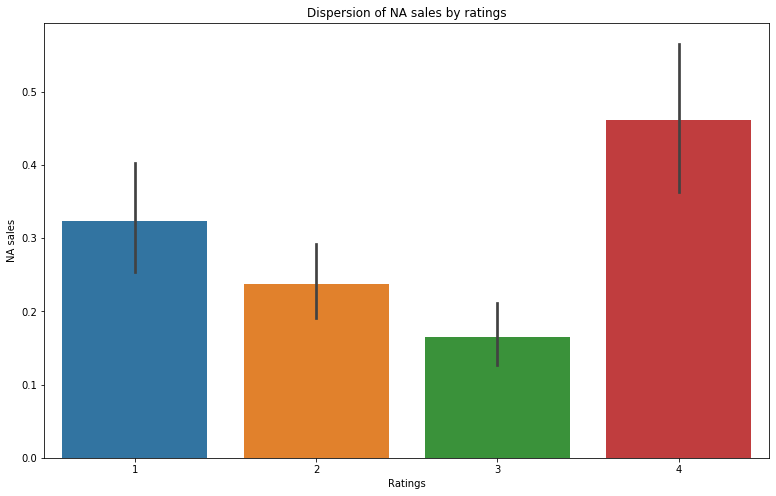

In [63]:
fig, ax = plt.subplots(figsize = (13, 8));
ax = sns.barplot(data=actual_data, x="num_rating", y="na_sales");
plt.title('Dispersion of NA sales by ratings');
plt.xlabel('Ratings');
plt.ylabel('NA sales');
actual_data['na_sales'].corr(actual_data['num_rating'])

For Europe:

0.046810145855342

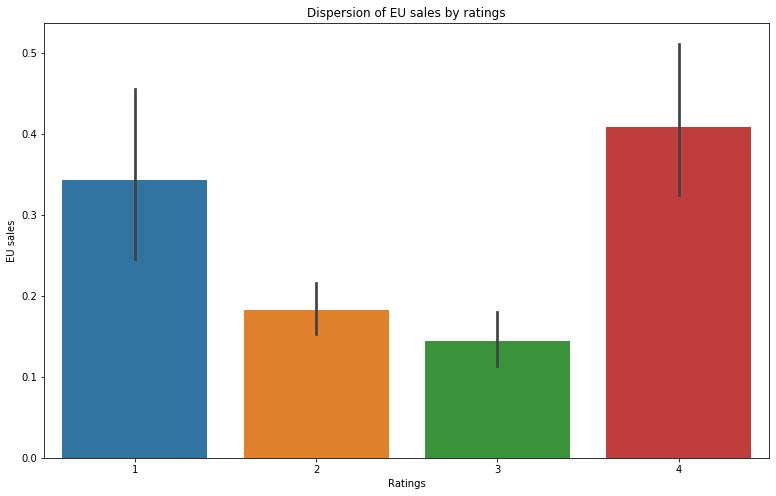

In [64]:
fig, ax = plt.subplots(figsize = (13, 8));
ax = sns.barplot(data=actual_data, x="num_rating", y="eu_sales");
plt.title('Dispersion of EU sales by ratings');
plt.xlabel('Ratings');
plt.ylabel('EU sales');
actual_data['eu_sales'].corr(actual_data['num_rating'])

For Japan:

-0.05378710439606278

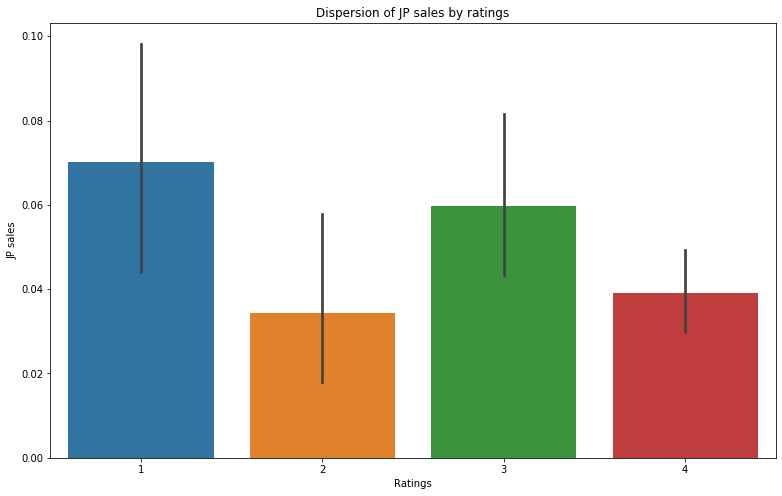

In [65]:
fig, ax = plt.subplots(figsize = (13, 8));
ax = sns.barplot(data=actual_data, x="num_rating", y="jp_sales");
plt.title('Dispersion of JP sales by ratings');
plt.xlabel('Ratings');
plt.ylabel('JP sales');
actual_data['jp_sales'].corr(actual_data['num_rating'])

***
Ok, we've figured out that for NA and EU correlation coefficient is positive, but dependence is weak, if rating increase from child to adult - sales increase as well, but not strong.   
In Japan, correlation coefficient is negative, dependence is weak, so almost no any dependence: if rating increase, sales decrease. 

### Step 5.  Test the following hypotheses:

**_The first one will be: Average user ratings of the Xbox One and PC platforms are the same_**   

According the first rule of Null hypothesis, it states with **equal sign**, but we have to formulate null hypothesis like a kind of opposite of our main question. In other words, if we're investigating whether there's a similarity between populations, the null hypothesis will be, **"No, there's no similarity, and the parameters in question are different."**   
Therefore, the alternative hypothesis will be: **"Yes, the similarity exists and the parameters in question are equal"**

In [66]:
hyp_plat = ['XOne', 'PC']

In [67]:
hyp_data = actual_data.query('platform in @hyp_plat').reset_index()
hyp_data.drop("index", axis = 1, inplace = True)
hyp_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,num_rating
0,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,79.0,M,5.47,4
1,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,54.0,M,5.26,4
2,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,64.0,T,4.49,3
3,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,62.0,M,4.22,4
4,Assassin's Creed: Unity,XOne,2014,Action,2.27,0.90,0.00,0.33,72.0,41.0,M,3.50,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,Ride 2,PC,2016,Racing,0.00,0.01,0.00,0.00,78.0,79.0,E,0.01,1
311,Saints Row: Gat out of Hell,XOne,2015,Action,0.00,0.01,0.00,0.00,65.0,60.0,M,0.01,4
312,Sébastien Loeb Rally Evo,XOne,2016,Racing,0.00,0.01,0.00,0.00,63.0,82.0,E,0.01,1
313,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,67.0,T,0.01,3


In [68]:
hyp_data.groupby('platform')['user_score'].mean()

platform
PC      63.093960
XOne    65.433735
Name: user_score, dtype: float64

In [69]:
pc1 = actual_data.query('platform == "PC"')['user_score']
xone1 = actual_data.query('platform == "XOne"')['user_score']

In [70]:
def t_test(sample1, sample2):
    alpha = 0.05
    p_value = st.ttest_ind(sample1, sample2, equal_var = False).pvalue
    print('P_value is:', p_value)
    if p_value < alpha: 
        print('We reject the null hypothesis')
    else:
        print("We can't reject the null hypothesis")

In [71]:
t_test(pc1, xone1)

P_value is: 0.18059382044628625
We can't reject the null hypothesis


So, we've figure out that we can't reject our null hypothesis, and average of sample1 isn't equal to average of sample 2. So we might consider that the difference exists. 

 **_Let's take a look on second hypotesis: Average user ratings for the Action and Sports genres are different._**    

Our null hypothesis will be **"No, there are no difference in and the parameters in question are equal."**. And the alternative hypothesis is: **"The parameters in question aren't equal."**   

In [72]:
action1 = actual_data.query('genre == "Action"')['user_score']
sports1 = actual_data.query('genre == "Sports"')['user_score']

In [73]:
t_test(action1, sports1)

P_value is: 9.701474292981394e-14
We reject the null hypothesis


And for second hypothesis we get rejection. That means we might assume difference of average user ratings for the Action and Sports genres

### General conclusion   
   
1. For Europe and North America markets:   

I highly recommend to pay more attention for games in genres **"Action", "Shooter" and "Sports"** of two potentially profitable platforms, **"PS4" and "XOne"**, and adjust advertising campaigns in further years by aim to push them on market. 

2. For Japan region:   

I would recommend to pay more attention for games in genres **"Action", "Shooter" and "Role-Playing"** of platforms "3DS" and "PS4". Also, it might be worth to "play" with promotions  